# CSE474/574 - Programming Assignment 2

In [1]:
!pip install tensorflow==1.14
import urllib.request
urllib.request.urlretrieve ("https://www.cse.buffalo.edu/ubds/docs/AI_quick_draw.pickle", "AI_quick_draw.pickle")

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)


('AI_quick_draw.pickle', <http.client.HTTPMessage at 0x154ee085148>)

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [2]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\anujn\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anujn\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anujn\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anujn\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data     

In [5]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [6]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

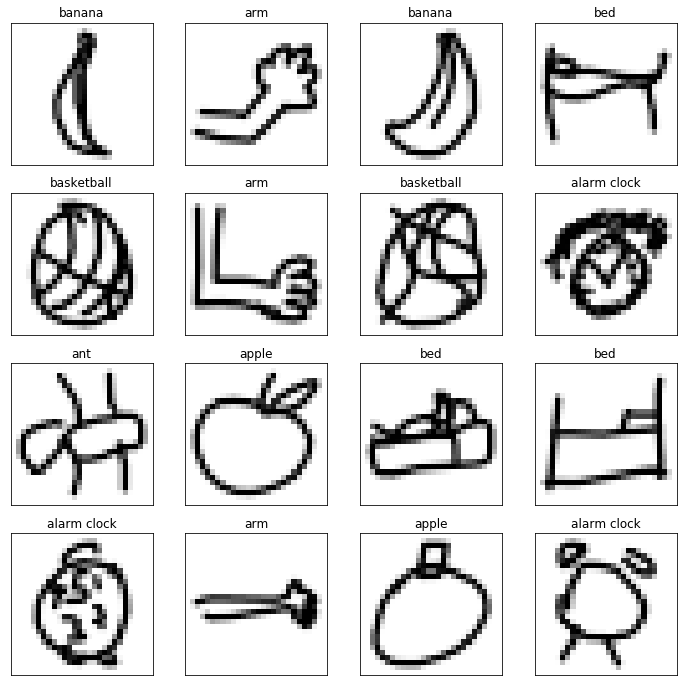

In [7]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [40]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Tasks - Resize, complexity change.

In [41]:
data_train_20_20 = resize_images(data_train,(20,20))
data_test_20_20 = resize_images(data_test,(20,20))

In [42]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=data_train_20_20.shape[1]))
model.add(Dense(64, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train_20_20, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 8s 77us/step - loss: 1.7711 - accuracy: 0.6446
Epoch 2/500
100000/100000 [==============================] - 7s 73us/step - loss: 0.8497 - accuracy: 0.7599
Epoch 3/500
100000/100000 [==============================] - 7s 71us/step - loss: 0.7715 - accuracy: 0.7843
Epoch 4/500
100000/100000 [==============================] - 7s 70us/step - loss: 0.7416 - accuracy: 0.7933
Epoch 5/500
100000/100000 [==============================] - 7s 70us/step - loss: 0.7235 - accuracy: 0.8025
Epoch 6/500
100000/100000 [==============================] - 7s 70us/step - loss: 0.7173 - accuracy: 0.8068
Epoch 7/500
100000/100000 [==============================] - 7s 71us/step - loss: 0.7390 - accuracy: 0.8080
Epoch 8/500
100000/100000 [==============================] - 7s 71us/step - loss: 0.7688 - accuracy: 0.8057
Epoch 9/500
100000/100000 [==============================] - 7s 71us/step - loss: 0.7954 - accuracy: 0.8052
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 7s 74us/step - loss: 1.6954 - accuracy: 0.4102
Epoch 151/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7382 - accuracy: 0.4139
Epoch 152/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7233 - accuracy: 0.4162
Epoch 153/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7406 - accuracy: 0.4199
Epoch 154/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7009 - accuracy: 0.4119
Epoch 155/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.7556 - accuracy: 0.4173
Epoch 156/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7132 - accuracy: 0.4079
Epoch 157/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.7217 - accuracy: 0.4071
Epoch 158/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.7150 - accuracy: 0.4009
Epoch 159/500
100000/100

100000/100000 [==============================] - 7s 70us/step - loss: 1.6200 - accuracy: 0.3996
Epoch 299/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.6401 - accuracy: 0.4014
Epoch 300/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.6695 - accuracy: 0.4031
Epoch 301/500
100000/100000 [==============================] - 8s 77us/step - loss: 1.6810 - accuracy: 0.4010
Epoch 302/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.6717 - accuracy: 0.3983
Epoch 303/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.6738 - accuracy: 0.3976
Epoch 304/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.6960 - accuracy: 0.3981
Epoch 305/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.7181 - accuracy: 0.3959
Epoch 306/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.7492 - accuracy: 0.3966
Epoch 307/500
100000/100

100000/100000 [==============================] - 7s 70us/step - loss: 2.1822 - accuracy: 0.2325
Epoch 373/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.2215 - accuracy: 0.2354
Epoch 374/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.1345 - accuracy: 0.2303
Epoch 375/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.2093 - accuracy: 0.2361
Epoch 376/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.2193 - accuracy: 0.2383
Epoch 377/500
100000/100000 [==============================] - 7s 72us/step - loss: 2.1417 - accuracy: 0.2376
Epoch 378/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.1081 - accuracy: 0.2359
Epoch 379/500
100000/100000 [==============================] - 7s 71us/step - loss: 2.1794 - accuracy: 0.2377
Epoch 380/500
100000/100000 [==============================] - 7s 72us/step - loss: 2.1629 - accuracy: 0.2346
Epoch 381/500
100000/100

In [43]:
predict_test = model.predict_classes(data_test_20_20)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20_20.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.25976


# 1 Hidden Layer (28 X 28)

In [9]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/500
100000/100000 [==============================] - 13s 131us/step - loss: 3.1882 - accuracy: 0.6186
Epoch 2/500
100000/100000 [==============================] - 12s 125us/step - loss: 1.4172 - accuracy: 0.6963
Epoch 3/500
100000/100000 [==============================] - 13s 135us/step - loss: 1.3971 - accuracy: 0.7122
Epoch 4/500
100000/100000 [==============================] - 12s 116us/step - loss: 1.3937 - accuracy: 0.7233
Epoch 5/500
100000/100000 [==============================] - 11s 109us/step - loss: 1.3760 - accuracy: 0.7303
Epoch 6/500
100000/100000 [==============================] - 11s 111us/step - loss: 1.3638 - accuracy: 0.7330
Epoch 7/500
100000/100000 [==============================] - 10s 100us/step - loss: 1.3585 - accuracy: 0.7369
Epoch 8/500
100000/100000 [==============================] - 10s 95us/step - loss: 1.3450 - accuracy: 0.7383
Epoch 9/500
100000/100000 [============

100000/100000 [==============================] - 14s 145us/step - loss: 0.8688 - accuracy: 0.8034
Epoch 144/500
100000/100000 [==============================] - 13s 127us/step - loss: 0.8488 - accuracy: 0.8053
Epoch 145/500
100000/100000 [==============================] - 14s 138us/step - loss: 0.8713 - accuracy: 0.8039
Epoch 146/500
100000/100000 [==============================] - 13s 132us/step - loss: 0.8654 - accuracy: 0.8040
Epoch 147/500
100000/100000 [==============================] - 13s 130us/step - loss: 0.8621 - accuracy: 0.8041
Epoch 148/500
100000/100000 [==============================] - 12s 118us/step - loss: 0.8652 - accuracy: 0.8048
Epoch 149/500
100000/100000 [==============================] - 12s 122us/step - loss: 0.8577 - accuracy: 0.8057
Epoch 150/500
100000/100000 [==============================] - 12s 120us/step - loss: 0.8298 - accuracy: 0.8062
Epoch 151/500
100000/100000 [==============================] - 12s 120us/step - loss: 0.8544 - accuracy: 0.8054
Epoch 

100000/100000 [==============================] - 13s 125us/step - loss: 0.7927 - accuracy: 0.8051
Epoch 289/500
100000/100000 [==============================] - 9s 91us/step - loss: 0.7657 - accuracy: 0.8048
Epoch 290/500
100000/100000 [==============================] - 9s 90us/step - loss: 0.7696 - accuracy: 0.8058
Epoch 291/500
100000/100000 [==============================] - 9s 90us/step - loss: 0.7762 - accuracy: 0.8053
Epoch 292/500
100000/100000 [==============================] - 9s 91us/step - loss: 0.8040 - accuracy: 0.8055
Epoch 293/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.7759 - accuracy: 0.8060
Epoch 294/500
100000/100000 [==============================] - 11s 112us/step - loss: 0.7661 - accuracy: 0.8061
Epoch 295/500
100000/100000 [==============================] - 11s 112us/step - loss: 0.7915 - accuracy: 0.8056
Epoch 296/500
100000/100000 [==============================] - 9s 92us/step - loss: 0.7946 - accuracy: 0.8050
Epoch 297/500
100

100000/100000 [==============================] - 11s 109us/step - loss: 0.7321 - accuracy: 0.8110
Epoch 434/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.7307 - accuracy: 0.8104
Epoch 435/500
100000/100000 [==============================] - 10s 101us/step - loss: 0.7260 - accuracy: 0.8105
Epoch 436/500
100000/100000 [==============================] - 13s 131us/step - loss: 0.7292 - accuracy: 0.8104
Epoch 437/500
100000/100000 [==============================] - 13s 126us/step - loss: 0.7289 - accuracy: 0.8103
Epoch 438/500
100000/100000 [==============================] - 13s 126us/step - loss: 0.7143 - accuracy: 0.8115
Epoch 439/500
100000/100000 [==============================] - 12s 120us/step - loss: 0.7246 - accuracy: 0.8112
Epoch 440/500
100000/100000 [==============================] - 12s 124us/step - loss: 0.7261 - accuracy: 0.8109
Epoch 441/500
100000/100000 [==============================] - 12s 118us/step - loss: 0.7359 - accuracy: 0.8109
Epoch 4

In [10]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.68948


**WARNING**: This cell will take a significantly long time to run

# 3 Hidden Layer (28 X 28)

In [11]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 13s 126us/step - loss: 2.3066 - accuracy: 0.3101
Epoch 2/500
100000/100000 [==============================] - 12s 123us/step - loss: 2.1031 - accuracy: 0.3101
Epoch 3/500
100000/100000 [==============================] - 12s 120us/step - loss: 2.3049 - accuracy: 0.2586
Epoch 4/500
100000/100000 [==============================] - 12s 121us/step - loss: 2.4492 - accuracy: 0.2353
Epoch 5/500
100000/100000 [==============================] - 12s 122us/step - loss: 2.4433 - accuracy: 0.2100
Epoch 6/500
100000/100000 [==============================] - 12s 121us/step - loss: 2.4859 - accuracy: 0.1948
Epoch 7/500
100000/100000 [==============================] - 13s 126us/step - loss: 2.5614 - accuracy: 0.1941
Epoch 8/500
100000/100000 [==============================] - 12s 121us/step - loss: 2.7094 - accuracy: 0.1757
Epoch 9/500
100000/100000 [==============================] - 12s 123us/step - loss: 2.5570 - accuracy: 0.1789
Epoch 10/5

100000/100000 [==============================] - 11s 108us/step - loss: 2.2177 - accuracy: 0.1488
Epoch 148/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3216 - accuracy: 0.1532
Epoch 149/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.2743 - accuracy: 0.1505
Epoch 150/500
100000/100000 [==============================] - 13s 130us/step - loss: 2.2864 - accuracy: 0.1497
Epoch 151/500
100000/100000 [==============================] - 11s 105us/step - loss: 2.3652 - accuracy: 0.1548
Epoch 152/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.2698 - accuracy: 0.1551
Epoch 153/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.2635 - accuracy: 0.1554
Epoch 154/500
100000/100000 [==============================] - 11s 109us/step - loss: 2.3902 - accuracy: 0.1593
Epoch 155/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.3975 - accuracy: 0.1589
Epoch 

100000/100000 [==============================] - 10s 105us/step - loss: 2.2199 - accuracy: 0.1503
Epoch 292/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.2412 - accuracy: 0.1517
Epoch 293/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.2468 - accuracy: 0.1503
Epoch 294/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.2007 - accuracy: 0.1457
Epoch 295/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.2479 - accuracy: 0.1498
Epoch 296/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3184 - accuracy: 0.1525
Epoch 297/500
100000/100000 [==============================] - 11s 106us/step - loss: 2.3477 - accuracy: 0.1544
Epoch 298/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.2704 - accuracy: 0.1501
Epoch 299/500
100000/100000 [==============================] - 10s 105us/step - loss: 2.2209 - accuracy: 0.1541
Epoch 

100000/100000 [==============================] - 11s 113us/step - loss: 2.1759 - accuracy: 0.1638
Epoch 437/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.2645 - accuracy: 0.1635
Epoch 438/500
100000/100000 [==============================] - 11s 113us/step - loss: 2.2832 - accuracy: 0.1653
Epoch 439/500
100000/100000 [==============================] - 11s 111us/step - loss: 2.2379 - accuracy: 0.1652
Epoch 440/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.2125 - accuracy: 0.1598
Epoch 441/500
100000/100000 [==============================] - 12s 120us/step - loss: 2.2068 - accuracy: 0.1663
Epoch 442/500
100000/100000 [==============================] - 12s 117us/step - loss: 2.1723 - accuracy: 0.1647
Epoch 443/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.2104 - accuracy: 0.1655
Epoch 444/500
100000/100000 [==============================] - 11s 111us/step - loss: 2.1983 - accuracy: 0.1667
Epoch 

In [12]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.16648


# 5 Hidden Layer (28 x 28)

In [13]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 13s 134us/step - loss: 2.3146 - accuracy: 0.1152
Epoch 2/500
100000/100000 [==============================] - 12s 124us/step - loss: 2.2991 - accuracy: 0.1051
Epoch 3/500
100000/100000 [==============================] - 13s 127us/step - loss: 2.3027 - accuracy: 0.0997
Epoch 4/500
100000/100000 [==============================] - 16s 158us/step - loss: 2.3028 - accuracy: 0.1000
Epoch 5/500
100000/100000 [==============================] - 16s 157us/step - loss: 2.3027 - accuracy: 0.0996
Epoch 6/500
100000/100000 [==============================] - 12s 124us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 7/500
100000/100000 [==============================] - 12s 120us/step - loss: 2.3027 - accuracy: 0.1004
Epoch 8/500
100000/100000 [==============================] - 15s 147us/step - loss: 2.3027 - accuracy: 0.0987
Epoch 9/500
100000/100000 [==============================] - 14s 136us/step - loss: 2.3027 - accuracy: 0.0979
Epoch 10/5

100000/100000 [==============================] - 14s 141us/step - loss: 2.3027 - accuracy: 0.0993
Epoch 148/500
100000/100000 [==============================] - 14s 139us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 149/500
100000/100000 [==============================] - 14s 135us/step - loss: 2.3027 - accuracy: 0.0996
Epoch 150/500
100000/100000 [==============================] - 12s 120us/step - loss: 2.3028 - accuracy: 0.0985
Epoch 151/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3027 - accuracy: 0.1001
Epoch 152/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0993
Epoch 153/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3027 - accuracy: 0.1000
Epoch 154/500
100000/100000 [==============================] - 12s 115us/step - loss: 2.3028 - accuracy: 0.0972
Epoch 155/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0992
Epoch 

100000/100000 [==============================] - 13s 131us/step - loss: 2.3027 - accuracy: 0.1005
Epoch 221/500
100000/100000 [==============================] - 15s 150us/step - loss: 2.3028 - accuracy: 0.0992
Epoch 222/500
100000/100000 [==============================] - 12s 117us/step - loss: 2.3028 - accuracy: 0.0985
Epoch 223/500
100000/100000 [==============================] - 12s 115us/step - loss: 2.3028 - accuracy: 0.0996
Epoch 224/500
100000/100000 [==============================] - 12s 125us/step - loss: 2.3027 - accuracy: 0.0998
Epoch 225/500
100000/100000 [==============================] - 12s 116us/step - loss: 2.3028 - accuracy: 0.0982
Epoch 226/500
100000/100000 [==============================] - 12s 124us/step - loss: 2.3028 - accuracy: 0.0986
Epoch 227/500
100000/100000 [==============================] - 14s 138us/step - loss: 2.3028 - accuracy: 0.1006
Epoch 228/500
100000/100000 [==============================] - 11s 114us/step - loss: 2.3028 - accuracy: 0.0973
Epoch 

100000/100000 [==============================] - 11s 108us/step - loss: 2.3027 - accuracy: 0.0989
Epoch 366/500
100000/100000 [==============================] - 11s 110us/step - loss: 2.3028 - accuracy: 0.0987
Epoch 367/500
100000/100000 [==============================] - 11s 113us/step - loss: 2.3028 - accuracy: 0.0982s - loss: 2.3028 - 
Epoch 368/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.3027 - accuracy: 0.1002
Epoch 369/500
100000/100000 [==============================] - 11s 108us/step - loss: 2.3028 - accuracy: 0.0987
Epoch 370/500
100000/100000 [==============================] - 11s 106us/step - loss: 2.3028 - accuracy: 0.0988
Epoch 371/500
100000/100000 [==============================] - 11s 109us/step - loss: 2.3027 - accuracy: 0.0999
Epoch 372/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.3027 - accuracy: 0.0992s -
Epoch 373/500
100000/100000 [==============================] - 11s 107us/step - loss: 2.3028 - a

In [14]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.1


# Resize 20 X 20, 1 Hidden Layer

In [15]:
data_train_20_20 = resize_images(data_train,(20,20))
data_test_20_20 = resize_images(data_test,(20,20))

In [16]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_20_20.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train_20_20, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 7s 73us/step - loss: 3.2504 - accuracy: 0.6403
Epoch 2/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2393 - accuracy: 0.7203
Epoch 3/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2092 - accuracy: 0.7323
Epoch 4/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2224 - accuracy: 0.7360
Epoch 5/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2312 - accuracy: 0.7398
Epoch 6/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2441 - accuracy: 0.7417
Epoch 7/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2612 - accuracy: 0.7415
Epoch 8/500
100000/100000 [==============================] - 8s 81us/step - loss: 1.2656 - accuracy: 0.7440
Epoch 9/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2712 - accuracy: 0.7442
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 7s 72us/step - loss: 1.0743 - accuracy: 0.7564
Epoch 151/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.0636 - accuracy: 0.7550
Epoch 152/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.0620 - accuracy: 0.7554
Epoch 153/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.0632 - accuracy: 0.7572
Epoch 154/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0543 - accuracy: 0.7543 0s - loss: 1.0519 - accuracy: 
Epoch 155/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.0653 - accuracy: 0.7560
Epoch 156/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0594 - accuracy: 0.7567
Epoch 157/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0706 - accuracy: 0.7569
Epoch 158/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0672 - accuracy: 

100000/100000 [==============================] - 7s 72us/step - loss: 1.0817 - accuracy: 0.7397
Epoch 225/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.0724 - accuracy: 0.7408
Epoch 226/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0801 - accuracy: 0.7397
Epoch 227/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.0755 - accuracy: 0.7397
Epoch 228/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0996 - accuracy: 0.7393
Epoch 229/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.0701 - accuracy: 0.7390
Epoch 230/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.0912 - accuracy: 0.7409
Epoch 231/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0673 - accuracy: 0.7392
Epoch 232/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0824 - accuracy: 0.7418
Epoch 233/500
100000/100

100000/100000 [==============================] - 9s 88us/step - loss: 1.0353 - accuracy: 0.7408
Epoch 373/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0323 - accuracy: 0.7390
Epoch 374/500
100000/100000 [==============================] - 11s 109us/step - loss: 1.0212 - accuracy: 0.7391
Epoch 375/500
100000/100000 [==============================] - 10s 96us/step - loss: 1.0142 - accuracy: 0.7394
Epoch 376/500
100000/100000 [==============================] - 8s 76us/step - loss: 1.0164 - accuracy: 0.7403
Epoch 377/500
100000/100000 [==============================] - 10s 105us/step - loss: 1.0184 - accuracy: 0.7390
Epoch 378/500
100000/100000 [==============================] - 11s 110us/step - loss: 1.0243 - accuracy: 0.7398
Epoch 379/500
100000/100000 [==============================] - 8s 77us/step - loss: 0.9969 - accuracy: 0.7409
Epoch 380/500
100000/100000 [==============================] - 10s 98us/step - loss: 1.0264 - accuracy: 0.7393
Epoch 381/500
10

100000/100000 [==============================] - 8s 82us/step - loss: 1.0153 - accuracy: 0.7381
Epoch 447/500
100000/100000 [==============================] - 8s 81us/step - loss: 1.0253 - accuracy: 0.7387
Epoch 448/500
100000/100000 [==============================] - 8s 81us/step - loss: 1.0205 - accuracy: 0.7384 0s - loss: 1.0176 
Epoch 449/500
100000/100000 [==============================] - 8s 82us/step - loss: 1.0073 - accuracy: 0.7384
Epoch 450/500
100000/100000 [==============================] - 8s 82us/step - loss: 1.0204 - accuracy: 0.7387
Epoch 451/500
100000/100000 [==============================] - 8s 82us/step - loss: 1.0267 - accuracy: 0.7374
Epoch 452/500
100000/100000 [==============================] - 8s 83us/step - loss: 1.0182 - accuracy: 0.7369
Epoch 453/500
100000/100000 [==============================] - 9s 87us/step - loss: 1.0255 - accuracy: 0.7376
Epoch 454/500
100000/100000 [==============================] - 8s 84us/step - loss: 1.0318 - accuracy: 0.7380
Epoch

In [17]:
predict_test = model.predict_classes(data_test_20_20)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20_20.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.66648


# Resize: 15 X 15, 1 Hidden Layer

In [18]:
data_train_20_20 = resize_images(data_train,(15,15))
data_test_20_20 = resize_images(data_test,(15,15))

In [19]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_20_20.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train_20_20, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 6s 63us/step - loss: 3.0666 - accuracy: 0.6603
Epoch 2/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.1383 - accuracy: 0.7324
Epoch 3/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.1172 - accuracy: 0.7503
Epoch 4/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.1034 - accuracy: 0.7579
Epoch 5/500
100000/100000 [==============================] - 6s 60us/step - loss: 1.1293 - accuracy: 0.7600
Epoch 6/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.1314 - accuracy: 0.7627
Epoch 7/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.1387 - accuracy: 0.7636
Epoch 8/500
100000/100000 [==============================] - 6s 60us/step - loss: 1.1576 - accuracy: 0.7653
Epoch 9/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1507 - accuracy: 0.7668
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 7s 68us/step - loss: 1.1378 - accuracy: 0.7529
Epoch 149/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.1215 - accuracy: 0.7532
Epoch 150/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1245 - accuracy: 0.7519
Epoch 151/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.1223 - accuracy: 0.7528
Epoch 152/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1275 - accuracy: 0.7529
Epoch 153/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.1230 - accuracy: 0.7516
Epoch 154/500
100000/100000 [==============================] - 7s 65us/step - loss: 1.1292 - accuracy: 0.7523
Epoch 155/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.1234 - accuracy: 0.7524
Epoch 156/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1153 - accuracy: 0.7532
Epoch 157/500
100000/100

100000/100000 [==============================] - 7s 65us/step - loss: 1.0314 - accuracy: 0.7512
Epoch 292/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.0336 - accuracy: 0.7503
Epoch 293/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.0558 - accuracy: 0.7516
Epoch 294/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.0372 - accuracy: 0.7517
Epoch 295/500
100000/100000 [==============================] - 7s 67us/step - loss: 1.0306 - accuracy: 0.7513
Epoch 296/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.0385 - accuracy: 0.7517 
Epoch 297/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.0495 - accuracy: 0.7499 0s - loss: 1.0424 
Epoch 298/500
100000/100000 [==============================] - 7s 65us/step - loss: 1.0477 - accuracy: 0.7511
Epoch 299/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.0515 - accuracy: 0.7509
Epoc

100000/100000 [==============================] - 7s 68us/step - loss: 1.0010 - accuracy: 0.7508 2s - loss: 0
Epoch 437/500
100000/100000 [==============================] - 7s 68us/step - loss: 0.9858 - accuracy: 0.7522
Epoch 438/500
100000/100000 [==============================] - 7s 68us/step - loss: 0.9984 - accuracy: 0.7513
Epoch 439/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.0016 - accuracy: 0.7504
Epoch 440/500
100000/100000 [==============================] - 7s 71us/step - loss: 0.9994 - accuracy: 0.7513
Epoch 441/500
100000/100000 [==============================] - 7s 67us/step - loss: 1.0092 - accuracy: 0.7506
Epoch 442/500
100000/100000 [==============================] - 7s 73us/step - loss: 0.9930 - accuracy: 0.7503
Epoch 443/500
100000/100000 [==============================] - 7s 72us/step - loss: 0.9929 - accuracy: 0.7507
Epoch 444/500
100000/100000 [==============================] - 7s 69us/step - loss: 0.9936 - accuracy: 0.7515
Epoch 445/5

In [20]:
predict_test = model.predict_classes(data_test_20_20)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20_20.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.6896


# Resize: 10 X 10, 1 Hidden Layer

In [21]:
data_train_20_20 = resize_images(data_train,(10,10))
data_test_20_20 = resize_images(data_test,(10,10))

In [22]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_20_20.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train_20_20, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 6s 56us/step - loss: 2.6044 - accuracy: 0.6941
Epoch 2/500
100000/100000 [==============================] - 5s 53us/step - loss: 0.9628 - accuracy: 0.7675
Epoch 3/500
100000/100000 [==============================] - 6s 58us/step - loss: 0.9575 - accuracy: 0.7810
Epoch 4/500
100000/100000 [==============================] - 5s 53us/step - loss: 0.9542 - accuracy: 0.7814
Epoch 5/500
100000/100000 [==============================] - 5s 54us/step - loss: 0.9746 - accuracy: 0.7838
Epoch 6/500
100000/100000 [==============================] - 5s 54us/step - loss: 0.9882 - accuracy: 0.7824 0s - loss:
Epoch 7/500
100000/100000 [==============================] - 6s 56us/step - loss: 0.9982 - accuracy: 0.7831
Epoch 8/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.0048 - accuracy: 0.7818
Epoch 9/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.0250 - accuracy: 0.7816
Epoch 10/500
1000

100000/100000 [==============================] - 7s 66us/step - loss: 1.3156 - accuracy: 0.7212
Epoch 150/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.3209 - accuracy: 0.7242
Epoch 151/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.3258 - accuracy: 0.7220
Epoch 152/500
100000/100000 [==============================] - 11s 111us/step - loss: 1.3214 - accuracy: 0.7217
Epoch 153/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.3191 - accuracy: 0.7227
Epoch 154/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.3211 - accuracy: 0.7225
Epoch 155/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.3011 - accuracy: 0.7206
Epoch 156/500
100000/100000 [==============================] - 9s 87us/step - loss: 1.3132 - accuracy: 0.7221 0s - loss: 1.3125 - accu
Epoch 157/500
100000/100000 [==============================] - 15s 146us/step - loss: 1.3167 - accuracy: 0.

100000/100000 [==============================] - 5s 50us/step - loss: 1.2834 - accuracy: 0.7081 0s - loss: 1.276
Epoch 293/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.2716 - accuracy: 0.7095
Epoch 294/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2994 - accuracy: 0.7091
Epoch 295/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.2777 - accuracy: 0.7109
Epoch 296/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.2775 - accuracy: 0.7086
Epoch 297/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2868 - accuracy: 0.7100 0s - loss:
Epoch 298/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.2772 - accuracy: 0.7090
Epoch 299/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2849 - accuracy: 0.7096
Epoch 300/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2718 - accuracy: 0.7

100000/100000 [==============================] - 5s 53us/step - loss: 1.2763 - accuracy: 0.7077
Epoch 437/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.2672 - accuracy: 0.7069
Epoch 438/500
100000/100000 [==============================] - 6s 63us/step - loss: 1.2756 - accuracy: 0.7085
Epoch 439/500
100000/100000 [==============================] - 6s 59us/step - loss: 1.2668 - accuracy: 0.7084
Epoch 440/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2602 - accuracy: 0.7092
Epoch 441/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.2624 - accuracy: 0.7091
Epoch 442/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.2754 - accuracy: 0.7088
Epoch 443/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.2666 - accuracy: 0.7086
Epoch 444/500
100000/100000 [==============================] - 6s 59us/step - loss: 1.2613 - accuracy: 0.7084
Epoch 445/500
100000/100

In [23]:
predict_test = model.predict_classes(data_test_20_20)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20_20.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.68692


# Resize: 5 X 5, 1 Hidden Layer

In [24]:
data_train_20_20 = resize_images(data_train,(5,5))
data_test_20_20 = resize_images(data_test,(5,5))

In [25]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train_20_20.shape[1]))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(data_train_20_20, label_train, epochs=500, batch_size=32)
print("training time %s seconds ---" % (time.time() - start_time))

Epoch 1/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.6690 - accuracy: 0.6887
Epoch 2/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.8394 - accuracy: 0.7734
Epoch 3/500
100000/100000 [==============================] - 4s 45us/step - loss: 0.8172 - accuracy: 0.7821
Epoch 4/500
100000/100000 [==============================] - 5s 46us/step - loss: 0.8245 - accuracy: 0.7849
Epoch 5/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.8358 - accuracy: 0.7844
Epoch 6/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.8414 - accuracy: 0.7836
Epoch 7/500
100000/100000 [==============================] - 5s 45us/step - loss: 0.8452 - accuracy: 0.7835
Epoch 8/500
100000/100000 [==============================] - 4s 44us/step - loss: 0.8557 - accuracy: 0.7823
Epoch 9/500
100000/100000 [==============================] - 5s 46us/step - loss: 0.8584 - accuracy: 0.7815
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 4s 42us/step - loss: 1.1458 - accuracy: 0.7221
Epoch 149/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1406 - accuracy: 0.7217
Epoch 150/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.1421 - accuracy: 0.7215
Epoch 151/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.1286 - accuracy: 0.7221
Epoch 152/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.1562 - accuracy: 0.7214
Epoch 153/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.1488 - accuracy: 0.7206
Epoch 154/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.1481 - accuracy: 0.7208
Epoch 155/500
100000/100000 [==============================] - 5s 45us/step - loss: 1.1359 - accuracy: 0.7206
Epoch 156/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.1474 - accuracy: 0.7214
Epoch 157/500
100000/100

100000/100000 [==============================] - 4s 42us/step - loss: 1.1596 - accuracy: 0.7068
Epoch 297/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1605 - accuracy: 0.7085
Epoch 298/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1684 - accuracy: 0.7102
Epoch 299/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.1607 - accuracy: 0.7081
Epoch 300/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1756 - accuracy: 0.7071
Epoch 301/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1629 - accuracy: 0.7080
Epoch 302/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1635 - accuracy: 0.7069
Epoch 303/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.1537 - accuracy: 0.7085
Epoch 304/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.1733 - accuracy: 0.7067
Epoch 305/500
100000/100

100000/100000 [==============================] - 5s 47us/step - loss: 1.1205 - accuracy: 0.7073
Epoch 445/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1227 - accuracy: 0.7074
Epoch 446/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1301 - accuracy: 0.7067
Epoch 447/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.1178 - accuracy: 0.7065
Epoch 448/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1302 - accuracy: 0.7084
Epoch 449/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1139 - accuracy: 0.7066
Epoch 450/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1124 - accuracy: 0.7072
Epoch 451/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1220 - accuracy: 0.7064
Epoch 452/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1237 - accuracy: 0.7067
Epoch 453/500
100000/100

In [26]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')

In [27]:
predict_test = model.predict_classes(data_test_20_20)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20_20.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.70764
